In [1]:
from dasly.das_master import Dasly
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the path to the YAML file
yaml_path = '../config.yml'

# Open and read the YAML file
with open(yaml_path, 'r') as file:
    params = yaml.safe_load(file)


# Access parameters from the YAML file
input_dir = params['input_dir']
start_exact_second = params['start_exact_second']
integrate = params['integrate']

database_type = params['database']['database_type']
dbapi = params['database']['dbapi']
endpoint = params['database']['endpoint']
port = params['database']['port']
database = params['database']['database']
database_table = params['database']['database_table']

hdf5_file_length = params['hdf5_file_length']
batch = params['dasly']['batch']
batch_gap = params['dasly']['batch_gap']

lowpass_filter_freq = params['lowpass_filter_freq']
decimate_t_rate = params['decimate_t_rate']

gaussian_smooth_s1 = params['gaussian_smooth']['s1']
gaussian_smooth_s2 = params['gaussian_smooth']['s2']
gaussian_smooth_std_s = params['gaussian_smooth']['std_s']

binary_threshold = params['binary_threshold']

hough_speed_res = params['hough_transform']['speed_res']
hough_length_meters = params['hough_transform']['length_meters']

dbscan_eps_seconds = params['dbscan_eps_seconds']

In [3]:
chIndex_all = np.arange(0, 800)
chIndex_remove1 = np.arange(0, 36)
chIndex_remove2 = np.arange(365, 387)
chIndex_remove3 = np.arange(751, 800)
chIndex_remove = np.concatenate((
    chIndex_remove1, chIndex_remove2, chIndex_remove3))
chIndex = np.setdiff1d(chIndex_all, chIndex_remove)
das = Dasly()
das.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/Aastfjordbrua/',
    start='20231005 082400',  # One car
    # start='20231005 085100',  # Noise
    duration=60,
    integrate=False,
    chIndex=chIndex,
)

get_file_paths...................................
start: 2023-10-05 08:24:00, <class 'datetime.datetime'>
duration: 60, <class 'int'>
end: 2023-10-05 08:25:00, <class 'datetime.datetime'>
simpleDASreader.find_DAS_files...................................
folder_path: /media/kptruong/yellow02/Aastfjordbrua/Aastfjordbrua/, <class 'str'>
start: 2023-10-05 08:24:00, <class 'datetime.datetime'>
duration: 60, <class 'int'>
simpleDASreader.find_DAS_files...................................


7 files, from 20231005 082354 to 20231005 082454


get_file_paths...................................


In [4]:
das.reset()
# forward Gaussian smoothing
###########################################################################
das.lowpass_filter(cutoff=lowpass_filter_freq)
das.decimate(t_rate=decimate_t_rate)
das.gaussian_smooth(
    s1=80,
    s2=90,
    std_s=10)
das.sobel_filter()

Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.


/home/kptruong/.conda/envs/kptruong/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kptruong/.conda/envs/kptruong/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


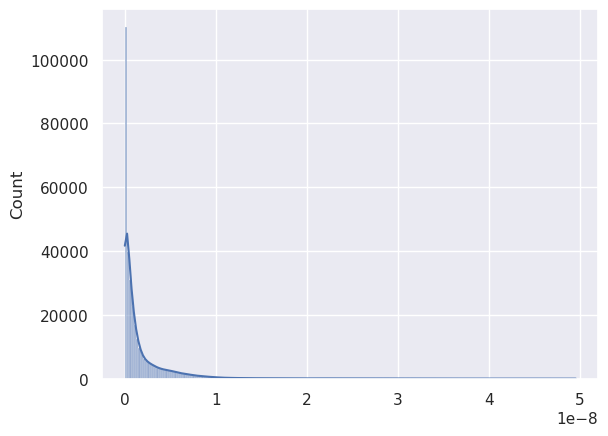

In [5]:
a = das.signal.values.flatten()
sns.histplot(a, bins=200, kde=True);
# plt.xlim(0, 1*1e-8)

Signal updated with binary transform with threshold 1e-08.


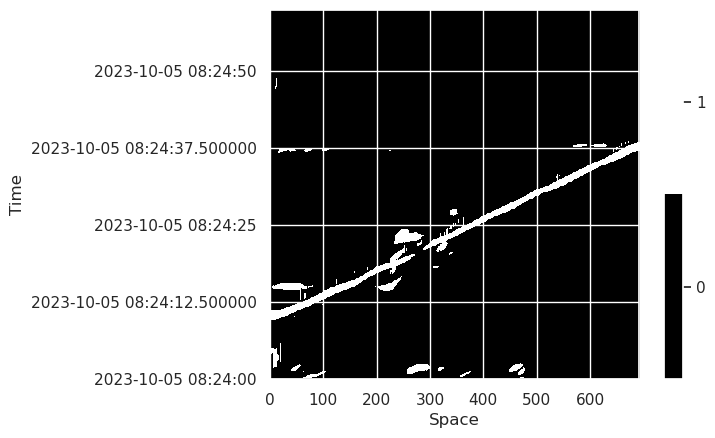

In [6]:
das.binary_transform(threshold=1e-8)
das.heatmap()

Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
Signal updated with binary transform with threshold 2e-08.


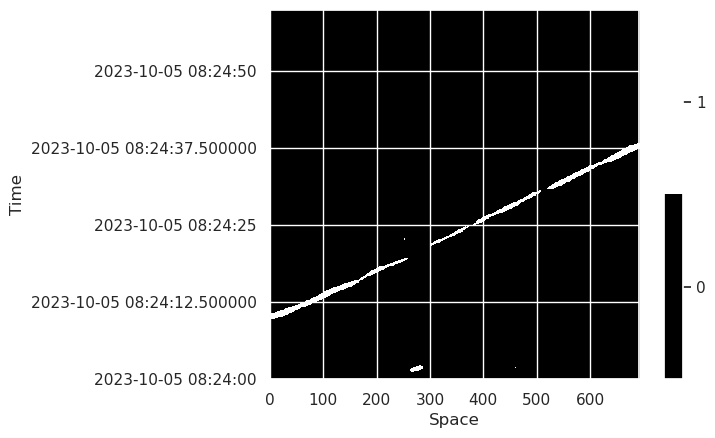

In [7]:
das.reset()
# forward Gaussian smoothing
###########################################################################
das.lowpass_filter(cutoff=lowpass_filter_freq)
das.decimate(t_rate=decimate_t_rate)
das.gaussian_smooth(
    s1=80,
    s2=90,
    std_s=10)
das.sobel_filter()
das.binary_transform(threshold=2e-8)
das.heatmap()

Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
Signal updated with binary transform with threshold 3e-08.


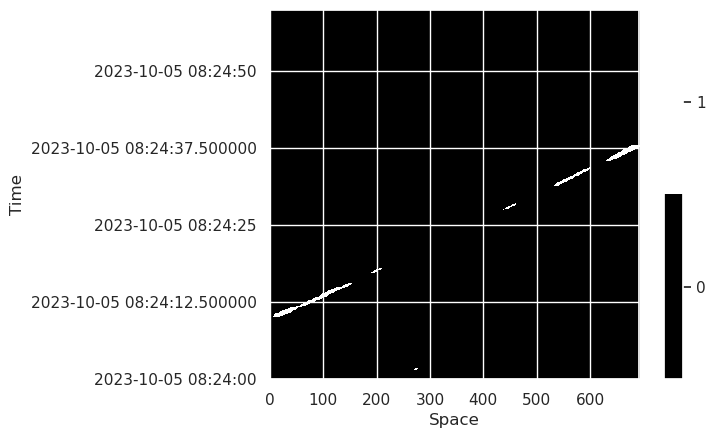

In [8]:
das.reset()
# forward Gaussian smoothing
###########################################################################
das.lowpass_filter(cutoff=lowpass_filter_freq)
das.decimate(t_rate=decimate_t_rate)
das.gaussian_smooth(
    s1=80,
    s2=90,
    std_s=10)
das.sobel_filter()
das.binary_transform(threshold=3e-8)
das.heatmap()